In [ ]:
pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"calebudeibom","key":"b3583ea76895dce41835d224039a50bb"}'}

In [ ]:
import os
import zipfile

# Create a hidden kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move kaggle.json there
!mv kaggle.json /root/.kaggle/kaggle.json

# Set permissions (important)
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
plantdisease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os

# List all files in the current working directory
os.listdir()

['.config',
 'dataset_split.zip',
 'dataset_split',
 'plantdisease.zip',
 'plant_disease_dataset',
 'sample_data']

In [ ]:
import zipfile

zip_path = 'plantdisease.zip'
extract_path = 'plant_disease_dataset'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped to:", extract_path)

✅ Dataset unzipped to: plant_disease_dataset


In [ ]:
# List first-level folders/files inside the extracted directory
os.listdir(extract_path)

['plantvillage', 'PlantVillage']

In [ ]:
# List contents of 'plantvillage'
print("Contents of 'plantvillage':")
print(os.listdir(os.path.join(extract_path, 'plantvillage')))

# List contents of 'PlantVillage'
print("\nContents of 'PlantVillage':")
print(os.listdir(os.path.join(extract_path, 'PlantVillage')))

Contents of 'plantvillage':
['PlantVillage']

Contents of 'PlantVillage':
['Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato__Target_Spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_healthy', 'Potato___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato_Early_blight', 'Potato___Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Late_blight']


In [ ]:
# Final dataset path to use
dataset_path = os.path.join(extract_path, 'plantvillage', 'PlantVillage')

In [ ]:
import os

# Define dataset path
dataset_path = os.path.join(extract_path, 'plantvillage', 'PlantVillage')

# Get class names (folder names)
class_names = sorted(os.listdir(dataset_path))
print("Number of classes:", len(class_names))
print("Class names:", class_names)

Number of classes: 15
Class names: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [ ]:
# Dictionary to store class name and image count
class_counts = {}

for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_folder)
    class_counts[class_name] = len(image_files)

# Display the result
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

Pepper__bell___Bacterial_spot: 997 images
Pepper__bell___healthy: 1478 images
Potato___Early_blight: 1000 images
Potato___Late_blight: 1000 images
Potato___healthy: 152 images
Tomato_Bacterial_spot: 2127 images
Tomato_Early_blight: 1000 images
Tomato_Late_blight: 1909 images
Tomato_Leaf_Mold: 952 images
Tomato_Septoria_leaf_spot: 1771 images
Tomato_Spider_mites_Two_spotted_spider_mite: 1676 images
Tomato__Target_Spot: 1404 images
Tomato__Tomato_YellowLeaf__Curl_Virus: 3209 images
Tomato__Tomato_mosaic_virus: 373 images
Tomato_healthy: 1591 images


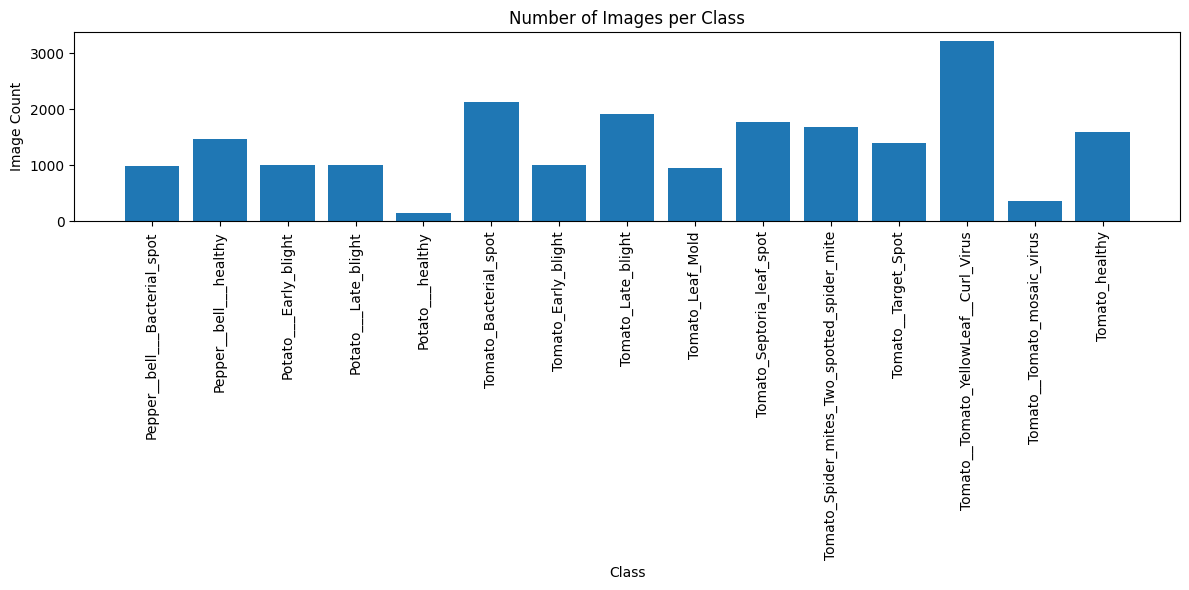

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Image Count")
plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
# Path where my organized split dataset will be stored
base_split_path = 'dataset_split'

# Create base folders if not exist
for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_split_path, split), exist_ok=True)


In [ ]:
for class_name in class_names:
    print(f"Processing class: {class_name}")

    class_dir = os.path.join(dataset_path, class_name)
    images = os.listdir(class_dir)
    image_paths = [os.path.join(class_dir, img) for img in images]

    # Split into train (70%) and temp (30%)
    train_imgs, temp_imgs = train_test_split(
        image_paths,
        test_size=0.3,
        random_state=42,
        shuffle=True
    )

    # Split temp into val (20%) and test (10%)
    val_imgs, test_imgs = train_test_split(
        temp_imgs,
        test_size=1/3,  # because 1/3 of 30% = 10%
        random_state=42,
        shuffle=True
    )

    # Helper function to copy images
    def copy_images(image_list, split_name):
        split_class_dir = os.path.join(base_split_path, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for src_path in image_list:
            filename = os.path.basename(src_path)
            dst_path = os.path.join(split_class_dir, filename)
            shutil.copyfile(src_path, dst_path)

    # Copy images to new folders
    copy_images(train_imgs, 'train')
    copy_images(val_imgs, 'val')
    copy_images(test_imgs, 'test')

Processing class: Pepper__bell___Bacterial_spot
Processing class: Pepper__bell___healthy
Processing class: Potato___Early_blight
Processing class: Potato___Late_blight
Processing class: Potato___healthy
Processing class: Tomato_Bacterial_spot
Processing class: Tomato_Early_blight
Processing class: Tomato_Late_blight


In [ ]:
# Count number of images in each split for a sample class
sample_class = class_names[0]

for split in ['train', 'val', 'test']:
    split_class_dir = os.path.join(base_split_path, split, sample_class)
    count = len(os.listdir(split_class_dir))
    print(f"{split.capitalize()} - {sample_class}: {count} images")

In [ ]:
import matplotlib.image as mpimg
import random

In [ ]:
# Path to the training data
train_dir = os.path.join(base_split_path, 'train')

In [ ]:
# Number of images to display
num_images = 10

# Get list of class names from train directory
class_names = os.listdir(train_dir)

# Collect random image paths and their labels
samples = []

for _ in range(num_images):
    # Pick a random class
    random_class = random.choice(class_names)
    class_path = os.path.join(train_dir, random_class)

    # Pick a random image from this class
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)

    # Store both image path and label
    samples.append((image_path, random_class))

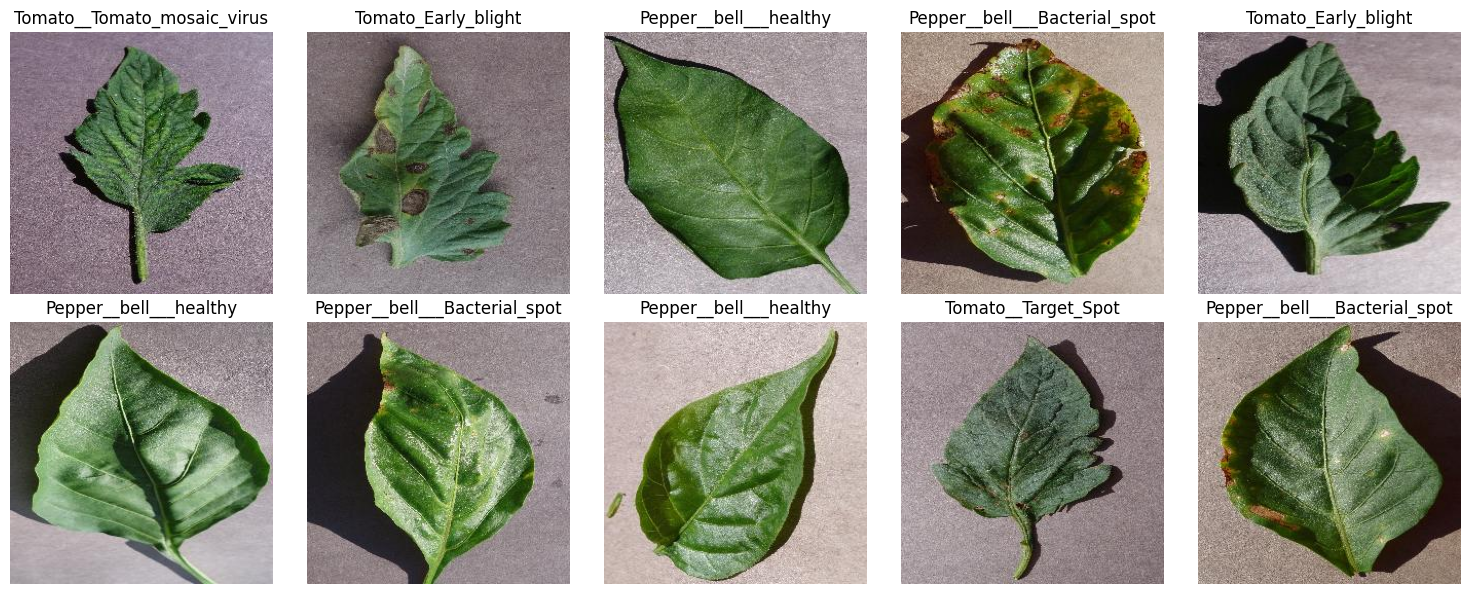

In [ ]:
# Create a 2x5 grid of subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Flatten axes (so it's just a list instead of 2D array)
axes = axes.ravel()

# Loop through my samples (image_path, class_name)
for i, (image_path, label) in enumerate(samples):
    img = mpimg.imread(image_path)   # Load image
    axes[i].imshow(img)              # Show image on subplot
    axes[i].set_title(label)         # Set class name as title
    axes[i].axis("off")              # Hide axis ticks

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Convert dictionary to dataframe
df = pd.DataFrame(list(class_counts.items()), columns=["Class", "Count"])

# Add a percentage column
df["Percent"] = (df["Count"] / df["Count"].sum()) * 100

df.sort_values("Percent", ascending=False).head(10)

,Class,Count,Percent
12,Tomato__Tomato_YellowLeaf__Curl_Virus,3209,15.548234
5,Tomato_Bacterial_spot,2127,10.305732
7,Tomato_Late_blight,1909,9.249479
9,Tomato_Septoria_leaf_spot,1771,8.580842
10,Tomato_Spider_mites_Two_spotted_spider_mite,1676,8.120548
14,Tomato_healthy,1591,7.708707
1,Pepper__bell___healthy,1478,7.161200
11,Tomato__Target_Spot,1404,6.802655
2,Potato___Early_blight,1000,4.845196
3,Potato___Late_blight,1000,4.845196


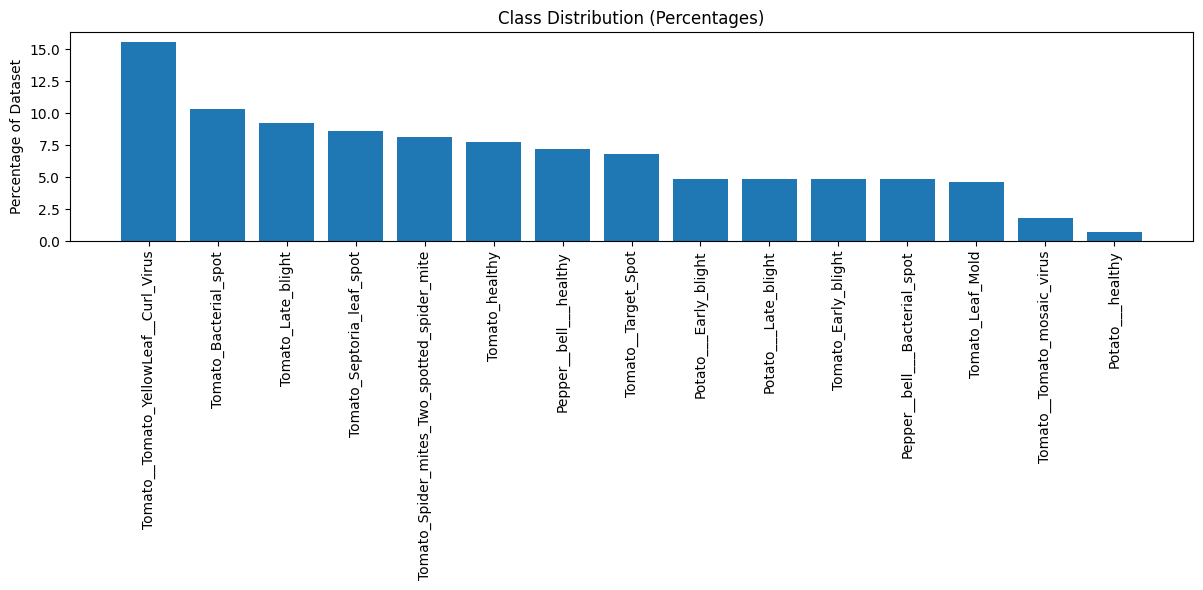

In [ ]:
# Sort dataframe by percentage
df_sorted = df.sort_values("Percent", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_sorted["Class"], df_sorted["Percent"])
plt.xticks(rotation=90)
plt.title("Class Distribution (Percentages)")
plt.ylabel("Percentage of Dataset")
plt.tight_layout()
plt.show()

In [ ]:
### Preprocessing Plan
#input size = 224x224
#normalize to 0-1
##Data augmentation:
  #Random rotation (±25°)
  #Horizontal flip
  #Random brightness/contrast adjustment